# Day 3

## Test of proportion

In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
import warnings
# import pandas_profiling as pp

warnings.filterwarnings('ignore')

In [2]:
P = 0.15
n=500
p=0.2
q= 1-p
se = np.sqrt(p*q/n)

zcal = (p-P)/se
zcal

2.7950849718747377

If p-value < alpha reject NULL HYPOTHESIS

proportions z test: Tests for proportions based on normal (z) test

In [3]:
proportions_ztest(100,500,0.15)

(2.7950849718747377, 0.005188607552315556)

### Two sample proportion test

Cannot use for continuous values

In [4]:
nm = 500
nf = 500
xm = 200
xf = 150
pm = xm/nm
pf = xf/nf
se = np.sqrt((pm*(1-pm)/nm)+(pf*(1-pf)/nf) )
print(se)
zcal = (pm-pf)/se
print(zcal)

0.03
3.3333333333333344


In [5]:
proportions_ztest([200,150],[500,500])

(3.3149677206589807, 0.0009165370761145276)

## CHI Square test

Problem statement is to check whether there is association between the gender and brand preference.

H0: There is an association between gender and preference

H1 (Alternate hypothesis): There is an association between gender and preference

In [6]:
bp = np.array([15,12,10,10,6,8,9,10]).reshape(4,2)
bp

array([[15, 12],
       [10, 10],
       [ 6,  8],
       [ 9, 10]])

In [7]:
# chi sq value , p-value , degrees of freedom, 
# Expected value matrix
stats.chi2_contingency(bp)

(0.6716791979949874, 0.8798441932056964, 3, array([[13.5, 13.5],
        [10. , 10. ],
        [ 7. ,  7. ],
        [ 9.5,  9.5]]))

## Dataset

In [8]:
df = pd.read_csv('./cs1.csv',index_col=False)
df.head()

,id,age,gender,region,income,married,children,car,save_act,current_act,mortgage,pl
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 12 columns):
id             330 non-null object
age            330 non-null int64
gender         330 non-null object
region         330 non-null object
income         330 non-null float64
married        330 non-null object
children       330 non-null int64
car            330 non-null object
save_act       330 non-null object
current_act    330 non-null object
mortgage       330 non-null object
pl             330 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 19.4+ KB


#### CHI Test

H0(Null hypothesis): There is no association between pl and Region
    
H1(Alternate hypothesis/ Contrary): There is an association between pl and Region

In [13]:
cross = pd.crosstab(df['pl'],df['region'])
cross

region,INNER_CITY,RURAL,SUBURBAN,TOWN
pl,,,,
NO,85,26,14,57
YES,70,28,11,39


In [15]:
cross.columns

Index(['INNER_CITY', 'RURAL', 'SUBURBAN', 'TOWN'], dtype='object', name='region')

In [20]:
# chi square (Calculated value) - 1.77
# p-value - 0.62
# degree of freedom - 3
# expected value - array(85.48484848, 29.78181818, 13.78787879, 52.94545455],[69.51515152, 24.21818182, 11.21212121, 43.05454545)
print(stats.chi2_contingency(cross))

(1.776514811293037, 0.6200588623676881, 3, array([[85.48484848, 29.78181818, 13.78787879, 52.94545455],
       [69.51515152, 24.21818182, 11.21212121, 43.05454545]]))


#### Critical value 

In [ ]:
sns.barplot()

In [24]:
# Percentile and degrees of freedom

# Inverse survival function
# stats.chi2.isf(0.05,3)

# Percent point function
# lower tail probability
stats.chi2.ppf(0.95,3)

7.814727903251179

Calculated value < critical value 

    1.77 < 7.81

It lies in the acceptance region. (Accepts null hypothesis)

Hence our NULL hypothesis is correct and it implies there is no association between `pl` and `region`.

#### Is there any association between number of children and pl?

In [28]:
cross1 = pd.crosstab(df['pl'],df['children'])
cross1

children,0,1,2,3
pl,,,,
NO,90,12,50,30
YES,51,57,32,8


#### CHI Test

H0(Null hypothesis): There is no association between children and pl (personal loan)
    
H1(Alternate hypothesis/ Contrary): There is an association between children and pl

In [30]:
# calculated chi square value
# p-value
# Degree of freedom
# Expected value
stats.chi2_contingency(cross1)

(53.89216994212963,
 1.1830750145503304e-11,
 3,
 array([[77.76363636, 38.05454545, 45.22424242, 20.95757576],
        [63.23636364, 30.94545455, 36.77575758, 17.04242424]]))

Our calculated values is greater than the critical value which implies our null hypothesis is wrong.

There is an association between children and personal loan.

## 1 x N 

Check whether the random generating alphabet machine is for goodness?

H0: the machine is fit for goodness
H1: the machine is not fit for goodness
    
alpha = 0.05

In [31]:
rn = np.array([25,19,12,19,25])

Degrees of freedom is `n-1`

In [32]:
stats.chisquare(rn)

Power_divergenceResult(statistic=5.8, pvalue=0.21459055821998824)

In [33]:
stats.chi2.ppf(0.95,4)

9.487729036781154

pvalue(0.21) is greater than 0.05, hence accepts H0. It means the machine is fit for goodness.

## Test of variance

### ANOVA

Is income same actoss the regions?

H0: mu_IC = mu_SU = mu_Rural = mu_town

H1: any(mu_IC != mu_SU != mu_Rural != mu_town)

alpha=0.05

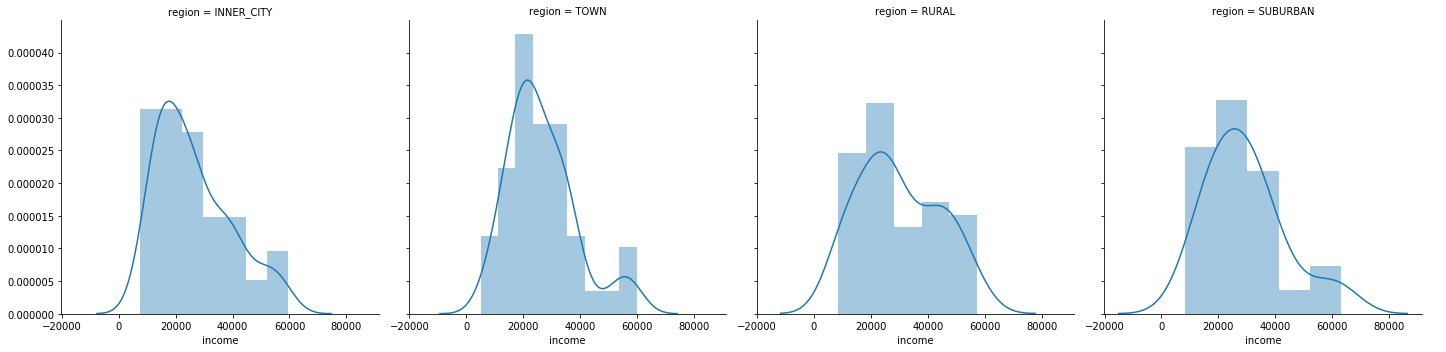

In [48]:
ax = sns.FacetGrid(df,col="region",height=5).map(sns.distplot,"income").add_legend()
# sns.distplot(df['income']

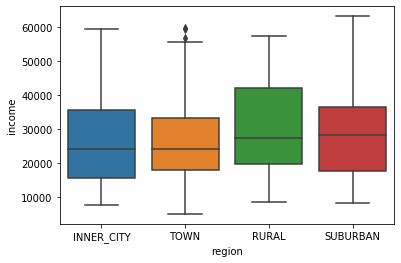

In [50]:
ax = sns.boxplot(data=df,x='region',y='income')

In [38]:
pd.crosstab(df['income'],df['region']).mean()

region
INNER_CITY    0.469697
RURAL         0.163636
SUBURBAN      0.075758
TOWN          0.290909
dtype: float64

In [58]:
df.pivot_table(values="income",index="region")

,income
region,
INNER_CITY,26439.952645
RURAL,29912.181296
SUBURBAN,29462.098000
TOWN,26495.416146


In [61]:
ic = df[df['region'] == 'INNER_CITY']['income']
town = df[df['region'] == 'TOWN']['income']
rural = df[df['region'] == 'RURAL']['income']
suburban = df[df['region'] == 'SUBURBAN']['income']

In [62]:
stats.f_oneway(ic,town,rural,suburban)

F_onewayResult(statistic=1.2950173064832669, pvalue=0.27607567314467585)

#### Critical value

In [79]:
stats.f.ppf(0.95,2,8)

4.458970107524511

In [80]:
stats.f.ppf(0.95,3,8)

4.06618055135116

In [71]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()

df['region_encode'] = lab.fit_transform(df['region'])

In [74]:
type(df.pivot_table(values="income",index="region"))

pandas.core.frame.DataFrame

In [77]:
stats.f_oneway()

F_onewayResult(statistic=1435.7248174270776, pvalue=1.5418977067835834e-167)

In [ ]:
sns.barplot()
sns.boxplot()

In [ ]:
plt.bar()

In [ ]:
np.log1p()

In [ ]:
sns.jointplot()

### Post Hoc Analysis (Turkey Honest Significance Difference - HSD)

Between which groups the means are not same